In [1]:
# Import necessary libraries
# The code  imports the required libraries for data analysis, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [50]:
# Read the training and test data into dataframes
df_train=pd.read_csv('/Users/abdul/Desktop/machine learning/data/home-data-for-ml-course/titanic/train.csv')
df_test=pd.read_csv('/Users/abdul/Desktop/machine learning/data/home-data-for-ml-course/titanic/test.csv')

In [14]:
# Display the first five rows of the training data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Display cross tabulation of the number of siblings/spouses and parents/children
cross_table = pd.crosstab(df_train['SibSp'], df_train['Parch'])
print(cross_table)

Parch    0   1   2  3  4  5  6
SibSp                         
0      537  38  29  1  1  2  0
1      123  57  19  3  3  3  1
2       16   7   4  1  0  0  0
3        2   7   7  0  0  0  0
4        0   9   9  0  0  0  0
5        0   0   5  0  0  0  0
8        0   0   7  0  0  0  0


In [128]:
# create a new column called family on 2 datasets
df_train['family'] = np.where((df_train['SibSp'] == 0) & (df_train['Parch'] == 0), 0, 1)
df_test['family'] = np.where((df_test['SibSp'] == 0) & (df_test['Parch'] == 0), 0, 1)
df_test['family'].value_counts()
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [4]:
# Fonction for count missing values
def compte_na(x):
    # Calculer le nombre de valeurs manquantes par colonne
    missing_counts = x.isna().sum()
    # Calculer le pourcentage de valeurs manquantes par colonne
    percent_missing = (x.isna().sum() / x.shape[0]) * 100
    # Créer un DataFrame contenant les informations sur les colonnes avec des valeurs manquantes
    columns_with_missing_values = pd.DataFrame({
        'Nom': missing_counts.index,
        'Nbr manquants': missing_counts.values,
        'Pourcent manquants': percent_missing.values
    })
    # Filtrer les colonnes avec des valeurs manquantes
    columns_with_missing_values = columns_with_missing_values[columns_with_missing_values['Nbr manquants'] > 0]
    # Ordonner par ordre décroissant
    columns_with_missing_values=columns_with_missing_values.sort_values(by='Pourcent manquants', ascending=False)
    return columns_with_missing_values

In [20]:
# Apply the function to the training data
compte_na(df_train)

,Nom,Nbr manquants,Pourcent manquants
10,Cabin,687,77.104377
5,Age,177,19.865320
11,Embarked,2,0.224467


In [21]:
# Drop the column 'Cabin' from the training data
df_train.drop(columns=['Cabin'], inplace=True)

In [22]:
# data type of the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  family       891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [138]:
# Create pipeline for preprocessing
variable_continue=['Pclass','Fare','SibSp','Age','Parch']
variable_categoriel=['Sex','Embarked']
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, variable_continue),
        ('cat', categorical_transformer, variable_categoriel)
    ])

In [139]:
# Define the models
from sklearn.ensemble import  RandomForestClassifier
model =  RandomForestClassifier(n_estimators=200, random_state=0)
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [140]:
# split the training data into training and validation subsets
from sklearn.model_selection import train_test_split
# Separate target from predictors
y = df_train.Survived
X = df_train.drop(['Survived'], axis=1)
# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=42)

In [155]:
# Apply pipeline to the training data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', clf)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# Evaluate the model
score = accuracy_score(y_test, preds)
print('accurency:', score)

accurency: 0.8268156424581006


[[91 14]
 [17 57]]


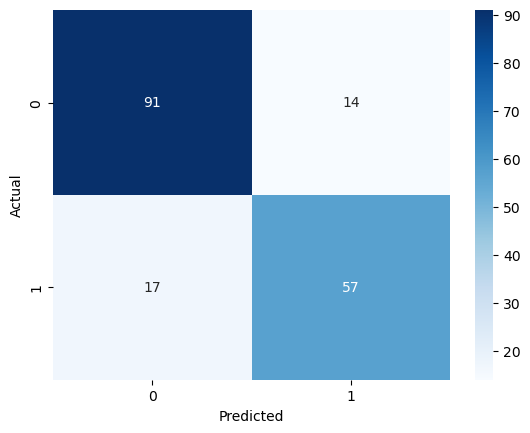

In [156]:
# visualisation of the confusion matrix
cm = confusion_matrix(y_test, preds)
print(cm)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [147]:
# Apply pipeline to the test data
pred_final=my_pipeline.predict(df_test)
pred_final

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
#submission
output = pd.DataFrame({'PassengerId': df_test['PassengerId'],
                       'Survived': pred_final})
output
output.to_csv('/Users/abdul/Desktop/machine learning/data/home-data-for-ml-course/titanic/soumission_python.csv', index=False)